In [108]:
#Data set appliance_energy.csv

In [109]:
import pandas as pd 
df = pd.read_csv("appliance_energy.csv")
df

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201
...,...,...
95,24.875912,2.079686
96,25.454657,2.506915
97,23.550820,2.525658
98,15.508383,1.689184


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          100 non-null    float64
 1   Energy Consumption (kWh)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [111]:
df.isnull().sum()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64

In [112]:
df.columns

Index(['Temperature (°C)', 'Energy Consumption (kWh)'], dtype='object')

In [113]:
#Feature identificatiom
X = df[["Temperature (°C)"]]
y = df["Energy Consumption (kWh)"]

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y ,train_size=0.8,random_state=32)

In [115]:
from sklearn.linear_model import LinearRegression  

lr = LinearRegression()

lr.fit(X_train, y_train) 


LinearRegression()

In [116]:
y_pred=lr.predict(X_train)
y_pred

array([1.99158415, 2.65198358, 3.08802804, 3.03253402, 2.19829812,
       2.58644754, 1.77012105, 1.86386814, 3.22709934, 1.96482003,
       2.83644505, 1.89258389, 2.10949504, 2.27925173, 1.94363088,
       2.86237529, 2.98277775, 2.95477696, 1.96222157, 3.13516131,
       2.16360672, 1.9672053 , 2.52636827, 2.37368689, 2.66964816,
       2.63767073, 2.9314025 , 2.93350423, 2.47770785, 1.76766456,
       2.30250839, 1.80868302, 1.70492282, 1.78491527, 2.91465217,
       2.93825528, 1.78574767, 2.5186555 , 2.86336071, 2.75300292,
       2.93190123, 2.20745738, 1.85371941, 1.82378413, 2.25280822,
       2.66256113, 3.00459871, 1.75865823, 1.67219082, 2.12526384,
       3.20864926, 1.73952078, 2.82593725, 2.47543549, 1.84059563,
       2.78871864, 3.28660589, 1.98551232, 3.25814236, 1.6969695 ,
       1.71967811, 2.41337417, 2.9929778 , 3.25164006, 2.55588028,
       1.8598476 , 2.68847639, 3.25867738, 1.91976833, 2.8279364 ,
       2.64794242, 2.43993375, 1.990008  , 2.14219924, 3.12263

In [117]:
X_train

,Temperature (°C)
26,18.993476
8,27.022300
7,32.323523
12,31.648853
59,21.506607
...,...
62,31.574750
54,26.958000
5,18.119890
43,33.186408


In [118]:
from sklearn.metrics import r2_score
r2= r2_score(y_train,y_pred)
print(f"R Square {r2}")

R Square 0.5581078847963443


In [119]:
import joblib as jb
jb.dump(lr,"Energy_data_Model.pkl")

['Energy_data_Model.pkl']

In [120]:
model=jb.load("Energy_data_Model.pkl")

In [121]:
import numpy as np
exp = float(input("Enter your Temperature value"))
new_data = np.array([[exp]])
predict=model.predict(new_data)
print(f"Predicted energy consumption on the experiance input {predict[0]:.2f}")

Enter your Temperature value 25


Predicted energy consumption on the experiance input 2.49


C:\Users\NICE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [122]:
#perfom the stream lit step further 

**Multi Lenear Regression

In [123]:
#Data set polynomial_regression_data.csv

In [133]:
import pandas as pd
df =pd.read_csv("polynomial_regression_data.csv")
df

,sno,Temperature,Pressure
0,1,0.000000,0.000000e+00
1,2,1.010101,2.061220e-10
2,3,2.020202,1.648976e-09
3,4,3.030303,5.565295e-09
4,5,4.040404,1.319181e-08
...,...,...,...
95,96,95.959596,1.767239e-04
96,97,96.969697,1.823636e-04
97,98,97.979798,1.881220e-04
98,99,98.989899,1.940004e-04


In [134]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

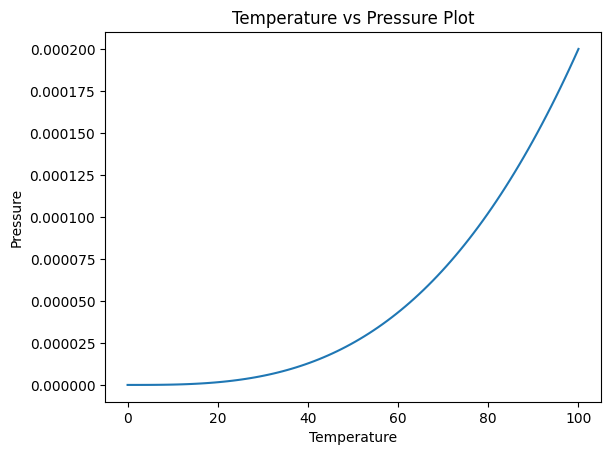

In [135]:
import numpy as np
import matplotlib.pyplot as plt

x = df['Temperature']
y = df['Pressure']

plt.plot(x, y)  
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Temperature vs Pressure Plot')
plt.show()


In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=45)

In [140]:
from sklearn.preprocessing import PolynomialFeatures
sr =  PolynomialFeatures(degree=4)
X_train_sr = sr.fit_transform(X_train)
X_test_sr = sr.transform(X_test)

In [141]:

model = LinearRegression()
model.fit(X_train_sr, y_train)

LinearRegression()

In [143]:
y_pred = model.predict(X_test_sr)
print(y_pred)

[6.87632645e-05 1.77228561e-05 1.04822239e-05 2.32297411e-05
 2.71419253e-05 2.56916391e-05 6.55915615e-05 4.82145415e-05
 3.42816719e-05 5.48596609e-05 7.12945656e-05 2.97979696e-05
 3.52724033e-05 1.70713646e-05 2.22119843e-05 2.46061347e-05
 2.60702265e-05 6.30113551e-06 5.69135052e-05 4.16577790e-05
 5.42560461e-05 4.13014439e-05 6.66204987e-05 7.72567130e-05
 1.28755703e-05 5.00500027e-05 1.96502941e-05 2.40229715e-05
 2.29714122e-05 6.71860455e-05 7.67848290e-05 2.46044019e-05
 4.27342303e-05 1.56427396e-05 2.46046498e-05 5.95569204e-05
 7.04874210e-05 7.75726867e-06 6.52370318e-05 2.40374969e-05
 4.21640160e-05 2.57277636e-05 4.32997005e-05 9.78022020e-06
 7.92274802e-05 7.96939934e-05 7.80486754e-05 5.02744467e-05
 6.47802267e-06 2.96380487e-05 8.02462032e-05 7.71884164e-05
 7.93883274e-05 2.48869390e-05 1.40536068e-05 5.32292459e-05
 6.94531133e-05 8.00048035e-05 4.75258338e-05 5.82660884e-05
 3.20646960e-05 2.75295888e-05 3.58333497e-05 2.44501534e-05
 2.58870429e-05 4.875471

In [144]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 0.00
R-squared Score: -0.18


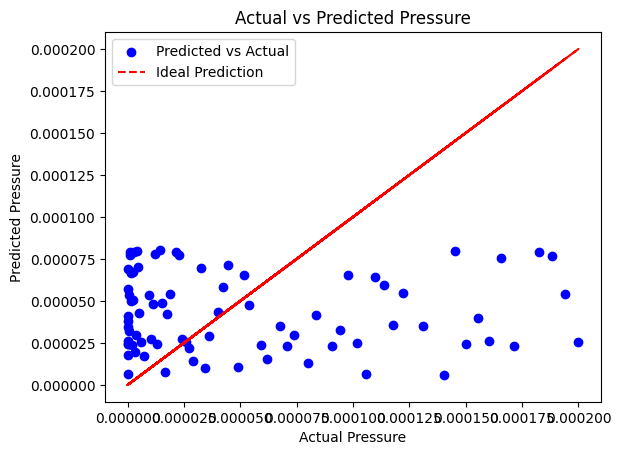

In [145]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', linestyle='dashed', label='Ideal Prediction')
plt.xlabel('Actual Pressure')
plt.ylabel('Predicted Pressure')
plt.title('Actual vs Predicted Pressure')
plt.legend()
plt.show()


In [146]:
X_train

,Temperature (°C)
34,34.312641
12,31.648853
87,27.751149
8,27.022300
46,21.234222
72,15.110442
57,18.919657
53,32.896547
14,18.636499
65,25.853922


import joblib as jb
jb.dump(sr,"Tempe.pkl")

In [148]:
model = jb.load("Tempe.pkl")

Third Task 

In [149]:
#Data set solar_power_output(in).csv

In [2]:
import pandas as pd
df = pd.read_csv("solar_power_output(in).csv")
df

,temperature,humidity,solar_irradiance,wind_speed,solar_power_output
0,19.363503,75.852937,266.619636,5.190818,128.101772
1,33.767858,62.887709,587.710853,4.791819,290.911789
2,28.299849,44.762209,885.651252,0.256421,442.336390
3,24.966462,85.103602,759.002398,3.412478,380.261988
4,13.900466,74.778494,825.905033,3.801956,415.931953
...,...,...,...,...,...
495,18.833806,27.326566,701.391519,6.569552,352.480220
496,24.591403,93.385086,657.541311,9.566146,326.834297
497,11.943366,30.945490,517.144639,0.689580,259.133251
498,34.359870,96.018988,441.807202,0.570547,223.778240


In [159]:
print("Further Reffer the Lab_1 pdf on whats app")

Further Reffer the Lab_1 pdf on whats app


In [3]:
df.columns

Index(['temperature', 'humidity', 'solar_irradiance', 'wind_speed',
       'solar_power_output'],
      dtype='object')